In [ ]:
!pip install nltk

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt


# LOAD FILES

In [ ]:
#mounted new google drive - train and val dataset are available in content/drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset
def read_corpus(file_path):
    with open(file_path, 'r') as file:
        #readlines() returns a list where each line is an element in the list.
        reviews = file.readlines()
    return reviews

train_data = read_corpus("/content/drive/MyDrive/A1_DATASET/train.txt")
validation_data = read_corpus("/content/drive/MyDrive/A1_DATASET/val.txt")


In [ ]:
#reading the dataset
def read_corpus(file_path):
    with open(file_path, 'r', encoding='latin-1') as file: # Changed encoding to latin-1
        #readlines() returns a list where each line is an element in the list.
        reviews = file.readlines()
    return reviews

train_data = read_corpus("/content/drive/MyDrive/A1_DATASET/train.txt")
validation_data = read_corpus("/content/drive/MyDrive/A1_DATASET/val.txt")

# Train and Test Data Summary

In [ ]:
print("Training data has ",len(train_data)," sentences")
print("Testing data has ",len(validation_data)," sentences")

Training data has  512  sentences
Testing data has  70  sentences


In [ ]:
#prints the first 5 record in the corpus. Did this just to make sure the datset was being read right.
print(train_data[:1])
print(train_data[1:2])
print(validation_data[:5])

['I booked two rooms four months in advance at the Talbott . We were placed on the top floor next to the elevators , which are used all night long . When speaking to the front desk , I was told that they were simply honoring my request for an upper floor , which I had requested for a better view . I am looking at a brick wall , and getting no sleep . He also told me that they had received complaints before from guests on the 16th floor , and were aware of the noise problem . Why then did they place us on this floor when the hotel is not totally booked ? A request for an upper floor does not constitute placing someone on the TOP floor and using that request to justify this . If you decide to stay here , request a room on a lower floor and away from the elevator ! I spoke at length when booking my two rooms about my preferences . This is simply poor treatment of a guest whom they believed would not complain .\n']
["I LOVED this hotel . The room was so chic and trendy , the bed was comfor

# PRE-PROCESSING

In [ ]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Calculate unique vocabulary count before preprocessing
def unique_vocabulary_count(corpus):
  all_tokens = []
  for sentence in corpus:
      tokens = word_tokenize(sentence.lower())
      all_tokens.extend(tokens)
  return len(set(all_tokens))



# Calculate unique vocabulary count after preprocessing
def unique_vocabulary_count_after(processed_corpus):
  all_tokens = [token for sentence in processed_corpus for token in sentence]
  return len(set(all_tokens))



# Preprocess each sentence
def preprocess_corpus(corpus):

  print("Unique vocabulary count before preprocessing:", unique_vocabulary_count(corpus))

  # Initialize lemmatizer
  lemmatizer = WordNetLemmatizer()

  processed_text = []

  for sentence in corpus:
      # Lowercase
      sentence = sentence.lower()

      # Remove commas but keep full stops
      sentence = sentence.replace(',', '')

      # Handle negations
      negations = {
          "can't": "cannot", "won't": "will not", "n't": " not",
          "isn't": "is not", "aren't": "are not", "wasn't": "was not",
          "weren't": "were not", "haven't": "have not", "hasn't": "has not",
          "hadn't": "had not", "doesn't": "does not", "don't": "do not",
          "didn't": "did not", "won't": "will not", "wouldn't": "would not",
          "shan't": "shall not", "shouldn't": "should not", "can't": "cannot",
          "couldn't": "could not", "mustn't": "must not", "mightn't": "might not"
      }
      for contraction, full_form in negations.items():
          sentence = re.sub(r"\b" + contraction + r"\b", full_form, sentence)

      # Remove numbers
      sentence = re.sub(r'\d+', '', sentence)

      # Expand contractions
      contractions = {
          "i'm": "i am", "it's": "it is", "you're": "you are",
          "they're": "they are", "we're": "we are", "he's": "he is",
          "she's": "she is", "that's": "that is", "there's": "there is",
          "what's": "what is", "who's": "who is", "where's": "where is",
          "how's": "how is", "let's": "let us"
      }
      for contraction, full_form in contractions.items():
          sentence = re.sub(r"\b" + contraction + r"\b", full_form, sentence)

      # Remove unwanted characters but keep full stops
      sentence = re.sub(r'[^a-zA-Z\s.]', '', sentence)

      # Tokenize
      tokens = word_tokenize(sentence)

      # Lemmatization
      tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]

      processed_text.append(tokens)

  print("Unique vocabulary count after preprocessing:", unique_vocabulary_count_after(processed_text))

  return processed_text



In [ ]:
# Preprocess the tarin corpus
tokenized_reviews_train = preprocess_corpus(train_data)

print(tokenized_reviews_train[:5])


Unique vocabulary count before preprocessing: 6330
Unique vocabulary count after preprocessing: 4836
[['i', 'book', 'two', 'room', 'four', 'months', 'in', 'advance', 'at', 'the', 'talbott', '.', 'we', 'be', 'place', 'on', 'the', 'top', 'floor', 'next', 'to', 'the', 'elevators', 'which', 'be', 'use', 'all', 'night', 'long', '.', 'when', 'speak', 'to', 'the', 'front', 'desk', 'i', 'be', 'tell', 'that', 'they', 'be', 'simply', 'honor', 'my', 'request', 'for', 'an', 'upper', 'floor', 'which', 'i', 'have', 'request', 'for', 'a', 'better', 'view', '.', 'i', 'be', 'look', 'at', 'a', 'brick', 'wall', 'and', 'get', 'no', 'sleep', '.', 'he', 'also', 'tell', 'me', 'that', 'they', 'have', 'receive', 'complaints', 'before', 'from', 'guests', 'on', 'the', 'th', 'floor', 'and', 'be', 'aware', 'of', 'the', 'noise', 'problem', '.', 'why', 'then', 'do', 'they', 'place', 'us', 'on', 'this', 'floor', 'when', 'the', 'hotel', 'be', 'not', 'totally', 'book', 'a', 'request', 'for', 'an', 'upper', 'floor', 'do

In [ ]:
tokenized_reviews_test = preprocess_corpus(validation_data)


Unique vocabulary count before preprocessing: 1787
Unique vocabulary count after preprocessing: 1471


# Unigram and Bigram Probabilities

## Unigrams

In [ ]:
 #this function is for finding unigrams

def unigram_counts(tokenized_reviews):
    unigram_count = defaultdict(int)
    total_tokens = 0

    for review in tokenized_reviews:
        for token in review:
            unigram_count[token] += 1
            total_tokens += 1

    return unigram_count, total_tokens


#using below function, calculated the probability by dividing by total number of tokens
def unigram_probabilities(unigram_count, total_tokens):
    unigram_probs = {word: count / total_tokens for word, count in unigram_count.items()}
    return unigram_probs




In [ ]:

unigram_count, total_tokens = unigram_counts(tokenized_reviews_train)

unigram_probs = unigram_probabilities(unigram_count, total_tokens)

#output looks good for unigram by showing the needed frequencies and probability.
print(unigram_count)
print(unigram_probs)


defaultdict(<class 'int'>, {'i': 1709, 'book': 118, 'two': 128, 'room': 1133, 'four': 20, 'months': 8, 'in': 1261, 'advance': 9, 'at': 745, 'the': 5301, 'talbott': 28, '.': 4741, 'we': 1116, 'be': 4075, 'place': 128, 'on': 640, 'top': 43, 'floor': 152, 'next': 107, 'to': 2090, 'elevators': 32, 'which': 177, 'use': 95, 'all': 278, 'night': 208, 'long': 39, 'when': 273, 'speak': 16, 'front': 127, 'desk': 159, 'tell': 103, 'that': 696, 'they': 490, 'simply': 19, 'honor': 16, 'my': 532, 'request': 66, 'for': 1026, 'an': 223, 'upper': 6, 'have': 1134, 'a': 2246, 'better': 91, 'view': 134, 'look': 116, 'brick': 6, 'wall': 58, 'and': 2593, 'get': 333, 'no': 257, 'sleep': 47, 'he': 84, 'also': 144, 'me': 247, 'receive': 26, 'complaints': 12, 'before': 67, 'from': 365, 'guests': 53, 'th': 66, 'aware': 9, 'of': 1046, 'noise': 30, 'problem': 38, 'why': 28, 'then': 77, 'do': 475, 'us': 214, 'this': 594, 'hotel': 1036, 'not': 950, 'totally': 9, 'constitute': 1, 'someone': 27, 'justify': 1, 'if': 20

In [ ]:
# Convert unigram_counts to a DataFrame
unigram_df = pd.DataFrame(unigram_count.items(), columns=['Unigram', 'Count'])

# Sort the DataFrame by count in descending order
sorted_unigram_df = unigram_df.sort_values(by='Count', ascending=False)

print("Sorted Unigram DataFrame:")
print("Total words in the corpus after cleaning: ", sorted_unigram_df['Count'].sum() )
sorted_unigram_df

Sorted Unigram DataFrame:
Total words in the corpus after cleaning:  83612


,Unigram,Count
9,the,5301
11,.,4741
13,be,4075
47,and,2593
41,a,2246
...,...,...
2905,candidate,1
2906,recruit,1
2908,meridien,1
2910,caffeinated,1


In [ ]:
sorted_unigram_df.head(20)

,Unigram,Count
9,the,5301
11,.,4741
13,be,4075
47,and,2593
41,a,2246
19,to,2090
0,i,1709
6,in,1261
40,have,1134
3,room,1133


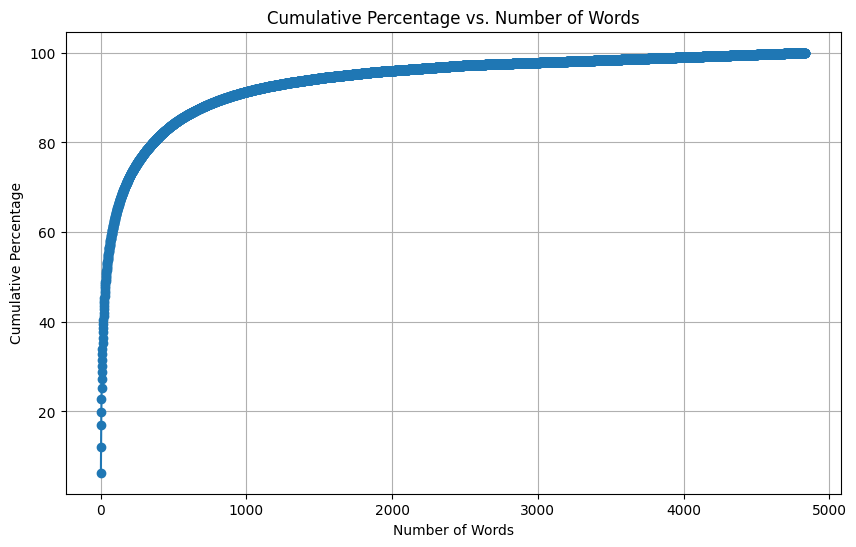

Number of words contributing to 80% of total occurrences: 360 out of 4836


In [ ]:
# Calculate the cumulative sum of counts
sorted_unigram_df['Cumulative Count'] = sorted_unigram_df['Count'].cumsum()
# Calculate the total number of words
total_count = sorted_unigram_df['Count'].sum()

# Calculate the cumulative percentage
sorted_unigram_df['Cumulative Percentage'] = (sorted_unigram_df['Cumulative Count'] / total_count) * 100
sorted_unigram_df['Number'] =1
sorted_unigram_df['Number'] = sorted_unigram_df['Number'].cumsum()



# Plotting the cumulative percentage curve
plt.figure(figsize=(10, 6))
plt.plot(sorted_unigram_df['Number'], sorted_unigram_df['Cumulative Percentage'], marker='o', linestyle='-')
plt.title('Cumulative Percentage vs. Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()



# For 80% frequency
threshold_80 = sorted_unigram_df[sorted_unigram_df['Cumulative Percentage'] <= 80]
num_words_80 = len(threshold_80)

print(f"Number of words contributing to 80% of total occurrences: {num_words_80} out of {sorted_unigram_df.shape[0]}")

# 80-20 rule is being followed, 5% words account for 80% of all occurences

In [ ]:
unigram_df['Probabilities'] = unigram_df['Unigram'].apply(lambda word: unigram_probs.get(word, 0))
unigram_df['Probabilities'].sum()

1.0

In [ ]:
unigram_df.sort_values(by='Count',ascending=False).head(20)

,Unigram,Count,Probabilities
9,the,5301,0.063400
11,.,4741,0.056702
13,be,4075,0.048737
47,and,2593,0.031012
41,a,2246,0.026862
19,to,2090,0.024996
0,i,1709,0.020440
6,in,1261,0.015082
40,have,1134,0.013563
3,room,1133,0.013551


## Bigrams

In [ ]:
#did similar function for bigrams
def bigram_counts(tokenized_reviews):
    bigram_count = defaultdict(int)

    for review in tokenized_reviews:
        for i in range(len(review) - 1):
            bigram = (review[i], review[i+1])
            bigram_count[bigram] += 1

    return bigram_count

# Example usage
bigram_count = bigram_counts(tokenized_reviews_train)

In [ ]:
#probability of bigrams was also found the same way as done for unigrams
def bigram_probabilities(bigram_count, unigram_count):
    bigram_probs = {bigram: count / unigram_count[bigram[0]] for bigram, count in bigram_count.items()}
    return bigram_probs

# Example usage
bigram_probs = bigram_probabilities(bigram_count, unigram_count)

In [ ]:
print(bigram_count)
print(bigram_probs)

defaultdict(<class 'int'>, {('i', 'book'): 21, ('book', 'two'): 1, ('two', 'room'): 3, ('room', 'four'): 2, ('four', 'months'): 1, ('months', 'in'): 2, ('in', 'advance'): 9, ('advance', 'at'): 1, ('at', 'the'): 334, ('the', 'talbott'): 26, ('talbott', '.'): 9, ('.', 'we'): 351, ('we', 'be'): 195, ('be', 'place'): 4, ('place', 'on'): 2, ('on', 'the'): 229, ('the', 'top'): 12, ('top', 'floor'): 5, ('floor', 'next'): 1, ('next', 'to'): 25, ('to', 'the'): 264, ('the', 'elevators'): 11, ('elevators', 'which'): 2, ('which', 'be'): 77, ('be', 'use'): 5, ('use', 'all'): 1, ('all', 'night'): 13, ('night', 'long'): 4, ('long', '.'): 5, ('.', 'when'): 77, ('when', 'speak'): 1, ('speak', 'to'): 4, ('the', 'front'): 97, ('front', 'desk'): 102, ('desk', 'i'): 1, ('i', 'be'): 236, ('be', 'tell'): 35, ('tell', 'that'): 20, ('that', 'they'): 35, ('they', 'be'): 73, ('be', 'simply'): 8, ('simply', 'honor'): 1, ('honor', 'my'): 2, ('my', 'request'): 3, ('request', 'for'): 5, ('for', 'an'): 22, ('an', 'up

### Bigram Data Analysis

In [ ]:
# Convert bigram_counts to a DataFrame
bigram_df = pd.DataFrame(bigram_count.items(), columns=['Bigram', 'Count'])

# Sort the DataFrame by count in descending order
sorted_bigram_df = bigram_df.sort_values(by='Count', ascending=False)

print("Sorted Bigram DataFrame:")
print(sorted_bigram_df)

Sorted Bigram DataFrame:
                  Bigram  Count
167             (., the)    885
56                (., i)    537
100         (the, hotel)    414
189            (in, the)    413
168          (the, room)    385
...                  ...    ...
14913      (paper, miss)      1
14912       (have, wall)      1
14911       (wall, have)      1
14909    (other, luxury)      1
32892  (they, advertise)      1

[32893 rows x 2 columns]


In [ ]:
sorted_bigram_df.head(15)

,Bigram,Count
167,"(., the)",885
56,"(., i)",537
100,"(the, hotel)",414
189,"(in, the)",413
168,"(the, room)",385
11,"(., we)",351
85,"(of, the)",343
8,"(at, the)",334
714,"(it, be)",311
169,"(room, be)",301


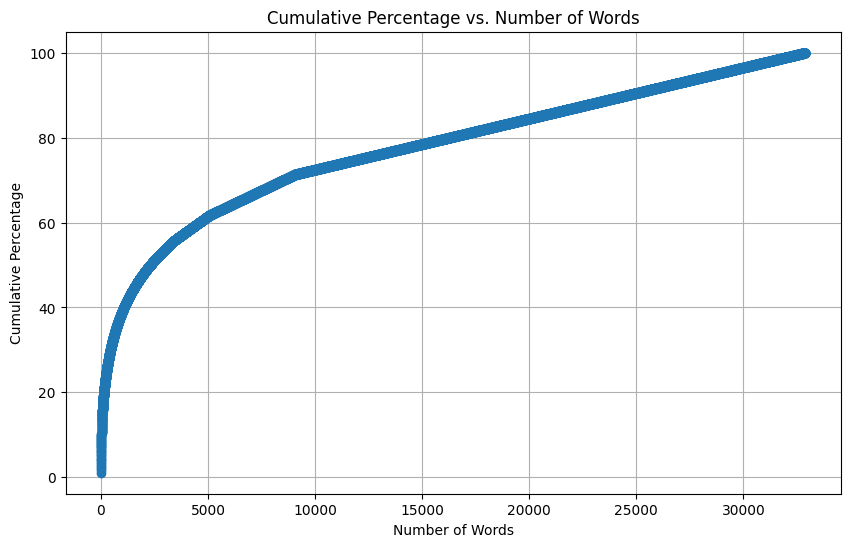

Number of words contributing to 40% of total occurrences: 1075 out of 32893


In [ ]:
# Calculate the cumulative sum of counts
sorted_bigram_df['Cumulative Count'] = sorted_bigram_df['Count'].cumsum()
# Calculate the total number of words
total_count_bigram = sorted_bigram_df['Count'].sum()

# Calculate the cumulative percentage
sorted_bigram_df['Cumulative Percentage'] = (sorted_bigram_df['Cumulative Count'] / total_count_bigram) * 100
sorted_bigram_df['Number'] =1
sorted_bigram_df['Number'] = sorted_bigram_df['Number'].cumsum()


# Plotting the cumulative percentage curve
plt.figure(figsize=(10, 6))
plt.plot(sorted_bigram_df['Number'], sorted_bigram_df['Cumulative Percentage'], marker='o', linestyle='-')
plt.title('Cumulative Percentage vs. Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()

# For 40% frequency
threshold_40 = sorted_bigram_df[sorted_bigram_df['Cumulative Percentage'] <= 40]
num_words_40 = len(threshold_40)

print(f"Number of words contributing to 40% of total occurrences: {num_words_40} out of {sorted_bigram_df.shape[0]}")

# 20% words account for 40% of all occurences

In [ ]:
bigram_df.sort_values(by='Count',ascending=False)

,Bigram,Count
167,"(., the)",885
56,"(., i)",537
100,"(the, hotel)",414
189,"(in, the)",413
168,"(the, room)",385
...,...,...
14913,"(paper, miss)",1
14912,"(have, wall)",1
14911,"(wall, have)",1
14909,"(other, luxury)",1


# Unknown


## Unkown Words Analysis

In [ ]:
from collections import Counter
# Step 1: Create a dictionary for test unigrams
unigram_counts_test = Counter(word for review in tokenized_reviews_test for word in review)
print("Total unique words in unigram: ",len(unigram_counts_test),"\n")


# Step 2: Convert to DataFrame
unigram_df_test = pd.DataFrame(unigram_counts_test.items(), columns=['Unigram', 'Count'])

print("Total word occurences in unigram: ",unigram_df_test['Count'].sum(),"\n")

# Step 3: Add Probability Column
def get_probability(word, unigram_counts):
  return unigram_counts.get(word, 0)  # Use 'N/A' for unknown words

unigram_df_test['Probability'] = unigram_df_test['Unigram'].apply(lambda word: get_probability(word, unigram_probs))

print("Test Unigram DataFrame with Probabilities:")
unigram_df_test.sort_values(by='Count',ascending=False)

Total unique words in unigram:  1471 

Total word occurences in unigram:  9144 

Test Unigram DataFrame with Probabilities:


,Unigram,Count,Probability
10,the,576,0.063400
9,.,524,0.056702
12,be,460,0.048737
33,and,297,0.031012
18,to,239,0.024996
...,...,...,...
825,arrange,1,0.000144
827,condo,1,0.000000
828,finish,1,0.000060
829,inexpensive,1,0.000012


In [ ]:
news_words = unigram_df_test[unigram_df_test['Probability'] == 0]
news_words.sort_values(by='Count',ascending=False)

,Unigram,Count,Probability
878,whistle,4,0.0
1372,seal,2,0.0
1111,bc,2,0.0
1165,accost,2,0.0
423,mr,2,0.0
...,...,...,...
858,theaters,1,0.0
860,dunkin,1,0.0
867,blah,1,0.0
868,nonluxury,1,0.0


In [ ]:
news_words

,Unigram,Count,Probability
42,wellequipped,1,0.0
111,travelwarning,1,0.0
131,consist,1,0.0
134,bisquit,1,0.0
136,moreover,1,0.0
...,...,...,...
1455,springy,1,0.0
1457,qtips,1,0.0
1461,highpitched,1,0.0
1463,rid,1,0.0


In [ ]:
print("New words unique count is :",news_words.shape[0],"\nThats a percentage of the total word count : ",news_words['Count'].shape[0]/unigram_df_test.shape[0]*100)
print("New words count is :",news_words['Count'].sum(),"\nThats a percentage of the total word count : ",news_words['Count'].sum()/unigram_df_test['Count'].sum()*100)

New words unique count is : 214 
Thats a percentage of the total word count :  14.547926580557444
New words count is : 223 
Thats a percentage of the total word count :  2.438757655293088


Maximum occurences are 4

14.54% words are new , however it is only 2.43% of the total word count

## Unknown Word Handling

### Unigram Unkowns

In [ ]:
UNK_THRESHOLD = 2
unigram_df_mod = unigram_df.copy()
unk_count = unigram_df_mod[unigram_df_mod['Count'] < UNK_THRESHOLD]['Count'].sum()
unigram_df_mod = unigram_df_mod[unigram_df_mod['Count'] >= UNK_THRESHOLD]
unigram_df_mod.index = unigram_df_mod['Unigram']
unigram_df_mod.drop(['Unigram'],axis=1,inplace=True)
unigram_df_mod.loc['<UNK>'] = {'Count': unk_count}

total_words = unigram_df_mod['Count'].sum()
unigram_df_mod['Probabilities'] = unigram_df_mod['Count'] / total_words

vocab_size = len(unigram_df_mod)

In [ ]:
print(vocab_size)

2518


In [ ]:
print(unigram_df.shape[0])

4836


In [ ]:
unigram_df_mod

,Count,Probabilities
Unigram,,
i,1709,0.020440
book,118,0.001411
two,128,0.001531
room,1133,0.013551
four,20,0.000239
...,...,...
cast,3,0.000036
leg,2,0.000024
doll,2,0.000024


###Bigram unkowns

In [ ]:
def get_word_or_unk(word):
  return word if word in unigram_df_mod.index else '<UNK>'

bigram_df['w1'] = bigram_df['Bigram'].apply(lambda x: get_word_or_unk(x[0]))
bigram_df['w2'] = bigram_df['Bigram'].apply(lambda x: get_word_or_unk(x[1]))
bigram_df['Bigram'] = list(zip(bigram_df['w1'], bigram_df['w2']))
bigram_df = bigram_df.groupby('Bigram').agg({'Count': 'sum'}).reset_index()

for _, row in bigram_df.iterrows():
  w1, w2 = row['Bigram']
  bigram_df.loc[_, 'Probability'] = row['Count'] / unigram_df_mod.loc[w1, 'Count']

bigram_df['w1'] = bigram_df['Bigram'].apply(lambda x: get_word_or_unk(x[0]))
bigram_df['w2'] = bigram_df['Bigram'].apply(lambda x: get_word_or_unk(x[1]))

In [ ]:
bigram_df

,Bigram,Count,Probability,w1,w2
0,"(., .)",22,0.004640,.,.
1,"(., ...)",7,0.001476,.,...
2,"(., <UNK>)",74,0.015609,.,<UNK>
3,"(., a)",27,0.005695,.,a
4,"(., about)",3,0.000633,.,about
...,...,...,...,...,...
27610,"(yummy, <UNK>)",2,0.400000,yummy,<UNK>
27611,"(yummy, room)",1,0.200000,yummy,room
27612,"(zest, .)",1,0.250000,zest,.
27613,"(zest, be)",2,0.500000,zest,be


### Test Data unknowns

In [ ]:
def get_word_or_unk(word):
  return word if word in unigram_df_mod.index else '<UNK>'

def process_test_sentence(sentence):
  return [get_word_or_unk(word) for word in sentence]

# Now apply this function to each sentence in your test set
processed_test_reviews_mod = [process_test_sentence(sentence) for sentence in tokenized_reviews_test]
processed_train_reviews_mod = [process_test_sentence(sentence) for sentence in tokenized_reviews_train]

In [ ]:
process_test_sentence

<function __main__.process_test_sentence(sentence)>

In [ ]:
processed_test_reviews_mod[1]

['we',
 'love',
 'the',
 'location',
 'and',
 '<UNK>',
 'to',
 'everything',
 '.',
 'the',
 'staff',
 'be',
 'very',
 'friendly',
 'and',
 'courteous',
 '.',
 'they',
 'be',
 'so',
 'nice',
 'to',
 'our',
 '.',
 'year',
 'old',
 'boy',
 '.',
 'get',
 'his',
 '<UNK>',
 'full',
 'of',
 '<UNK>',
 'the',
 'moment',
 'we',
 'arrive',
 '.',
 'we',
 'get',
 'free',
 'wifi',
 'and',
 'morning',
 'drink',
 'by',
 'sign',
 'up',
 'for',
 'select',
 'guest',
 'program',
 '.',
 'ca',
 'not',
 'beat',
 'that',
 'the',
 'only',
 'minor',
 'issue',
 'be',
 'the',
 'elevator',
 '.',
 'we',
 'have',
 'to',
 'take',
 'separate',
 'elevator',
 'trip',
 'to',
 'get',
 'to',
 'our',
 'room',
 '.',
 'it',
 'get',
 'a',
 'little',
 'annoy',
 'when',
 'we',
 'be',
 'go',
 'in',
 'and',
 'out',
 'often',
 '.',
 'otherwise',
 'it',
 'be',
 'a',
 'great',
 'stay']

# Smoothing

In [ ]:
# Smoothing

def smooth_unigrams(unigrams_df, k):
  total_words = unigrams_df['Count'].sum()
  smoothed_probs = {}
  for word, row in unigrams_df.iterrows():
      count = row['Count']
      smoothed_prob = (count + k) / (total_words + k * vocab_size)
      smoothed_probs[word] = smoothed_prob
  return smoothed_probs


def smooth_bigrams(bigram_df, unigrams_df, k):

    vocab_size = len(unigrams_df)
    smoothed_probs = defaultdict(lambda: defaultdict(float))

    for index, row in bigram_df.iterrows():
        w1, w2 = row['Bigram']
        count = row['Count']

        # Check if w1 exists in unigrams_df before accessing it.
        if w1 in unigrams_df.index:
            w1_count = unigrams_df.loc[w1, 'Count']
        else:  # If w1 is not found, consider it as having zero count for smoothing.
            w1_count = 0

        #Calculate the smoothed bigram probability using add-k smoothing
        smoothed_prob = (count + k) / (w1_count + k * vocab_size)
        smoothed_probs[w1][w2] = smoothed_prob

    return smoothed_probs


# Perplexity

In [ ]:
total_words

83612

In [ ]:
def unigram_perplexity(test_sentences, smoothed_unigrams, total_words, k=0.01, unknown_token="<UNK>"):
  log_prob_sum = 0
  total_token_count = 0

  # Calculate vocabulary size from the smoothed unigrams
  vocab_size = len(smoothed_unigrams)

  for sentence in test_sentences:
      sentence_log_prob = 0
      for word in sentence:
          # Handle unknown words with add-k smoothing
          if word in smoothed_unigrams:
              prob = smoothed_unigrams[word]
          else:
              prob = k / (total_words + k * vocab_size)

          sentence_log_prob += np.log2(prob)

      log_prob_sum += sentence_log_prob
      total_token_count += len(sentence)

  # Calculate the average log probability per word
  avg_log_prob = log_prob_sum / total_token_count if total_token_count > 0 else float('inf')

  # Calculate perplexity
  perplexity = 2 ** (-avg_log_prob)
  return perplexity



# def unigram_perplexity(test_sentences, smoothed_unigrams, unknown_token="<UNK>"):
#   log_prob_sum = 0
#   token_count = 0

#   for sentence in test_sentences:
#       for word in sentence:
#           # Handle unknown words
#           prob = smoothed_unigrams.get(word, smoothed_unigrams.get(unknown_token, 1e-10))
#           log_prob_sum += np.log2(prob)
#           token_count += 1

#   return 2 ** (-log_prob_sum / token_count) if token_count > 0 else float('inf')

def bigram_perplexity(test_sentences, smoothed_bigrams, smoothed_unigrams, k=0.01, unknown_token="<UNK>"):
  log_prob_sum = 0
  token_count = 0
  vocab_size = len(smoothed_unigrams)

  for sentence in test_sentences:
      for i in range(1, len(sentence)):
          w1, w2 = sentence[i-1], sentence[i]

          # Handle unknown words
          if w1 not in smoothed_unigrams:
              w1 = unknown_token
          if w2 not in smoothed_unigrams:
              w2 = unknown_token

          # Calculate bigram probability with add-k smoothing
          bigram_prob = smoothed_bigrams[w1].get(w2, 0)
          if bigram_prob == 0:
              # Apply add-k smoothing
              bigram_prob = (k) / (smoothed_unigrams[w1] + k * vocab_size)

          log_prob_sum += np.log2(bigram_prob)
          token_count += 1

  return 2 ** (-log_prob_sum / token_count) if token_count > 0 else float('inf')



## Results

In [ ]:
k=0.01
smoothed_unigrams = smooth_unigrams(unigram_df_mod, k)

In [ ]:

smoothed_unigrams = smooth_unigrams(unigram_df_mod, 0)

unigram_perp = unigram_perplexity(processed_test_reviews_mod, smoothed_unigrams, total_words)

unigram_perp_train = unigram_perplexity(processed_train_reviews_mod, smoothed_unigrams,total_words)

print(f"k = {0}")
print(f"Unigram Train perplexity: {unigram_perp_train}")
print(f"Unigram perplexity: {unigram_perp}")


# Calculate perplexities for different k values
k_values = [0.01, 0.05, 0.25, 1, 1.25, 6.25, 32.5]

for k in k_values:
  smoothed_unigrams = smooth_unigrams(unigram_df_mod, k)
  smoothed_bigrams = smooth_bigrams(bigram_df, unigram_df_mod, k)

  unigram_perp = unigram_perplexity(processed_test_reviews_mod, smoothed_unigrams, total_words)
  bigram_perp = bigram_perplexity(processed_test_reviews_mod, smoothed_bigrams, smoothed_unigrams, k)

  unigram_perp_train = unigram_perplexity(processed_train_reviews_mod, smoothed_unigrams,total_words)
  bigram_perp_train = bigram_perplexity(processed_train_reviews_mod, smoothed_bigrams, smoothed_unigrams, k)

  print(f"k = {k}")
  print(f"Unigram Train perplexity: {unigram_perp_train}")
  print(f"Unigram perplexity: {unigram_perp}")
  print(f"Bigram  Train perplexity: {bigram_perp_train}")
  print(f"Bigram perplexity: {bigram_perp}")
  print()

k = 0
Unigram Train perplexity: 279.08615366837904
Unigram perplexity: 254.43154770253966
k = 0.01
Unigram Train perplexity: 279.0862412982921
Unigram perplexity: 254.44252202380147
Bigram  Train perplexity: 57.01716878987369
Bigram perplexity: 125.43775649928487

k = 0.05
Unigram Train perplexity: 279.0883200059509
Unigram perplexity: 254.4876256839977
Bigram  Train perplexity: 87.4754414979642
Bigram perplexity: 159.86163907592845

k = 0.25
Unigram Train perplexity: 279.1374835998249
Unigram perplexity: 254.74021731672627
Bigram  Train perplexity: 172.20682937139307
Bigram perplexity: 248.9205966192927

k = 1
Unigram Train perplexity: 279.7767300708934
Unigram perplexity: 256.0053786756329
Bigram  Train perplexity: 352.6380397458351
Bigram perplexity: 423.5269135974628

k = 1.25
Unigram Train perplexity: 280.1122220099844
Unigram perplexity: 256.51270944581836
Bigram  Train perplexity: 396.7216601924875
Bigram perplexity: 465.14433597109746

k = 6.25
Unigram Train perplexity: 292.377

#EXTRAAS

In [ ]:
import pandas as pd

# Updated data
data = {
  "k": [0, 0.01, 0.05, 0.25, 1, 1.25, 6.25, 32.5],
  "Unigram Train Perplexity": [279.08615366837904, 279.0862412982921, 279.0883200059509, 279.1374835998249, 279.7767300708934, 280.1122220099844, 292.37779684137263, 378.2302840493684],
  "Unigram Test Perplexity": [254.43154770253966, 254.44252202380147, 254.4876256839977, 254.74021731672627, 256.0053786756329, 256.51270944581836, 270.5202493003015, 356.64982478206053],
  "Bigram Train Perplexity": [57.01716878987369, 57.01716878987369, 87.4754414979642, 172.20682937139307, 352.6380397458351, 396.7216601924875, 867.7136068126568, 1537.2291224],
  "Bigram Test Perplexity": [125.43775649928487, 125.43775649928487, 159.86163907592845, 248.9205966192927, 423.5269135974628, 465.14433597109746, 908.5562424482883, 1552.1680029178578]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('perplexity_data.csv', index=False)

In [ ]:
#Visuals for report - perplexity comparing

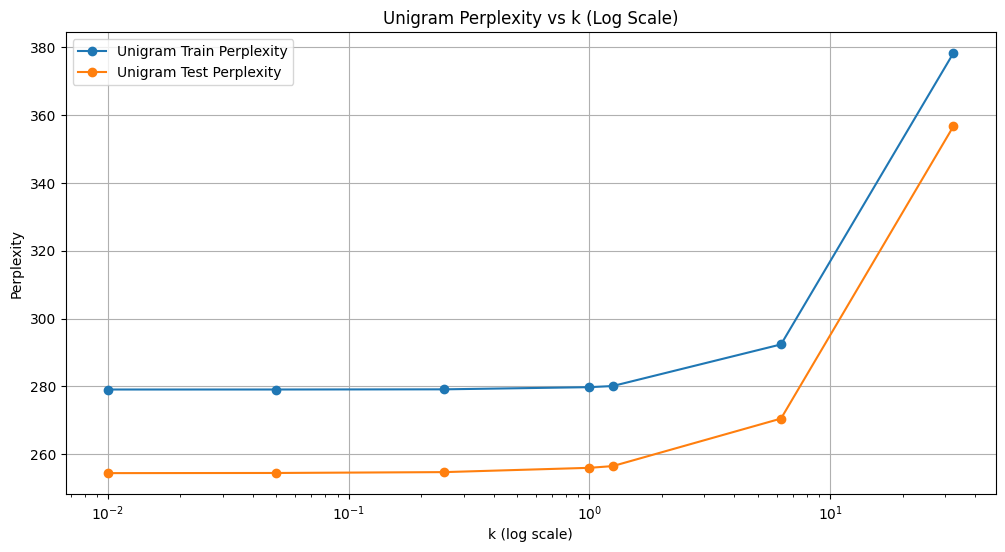

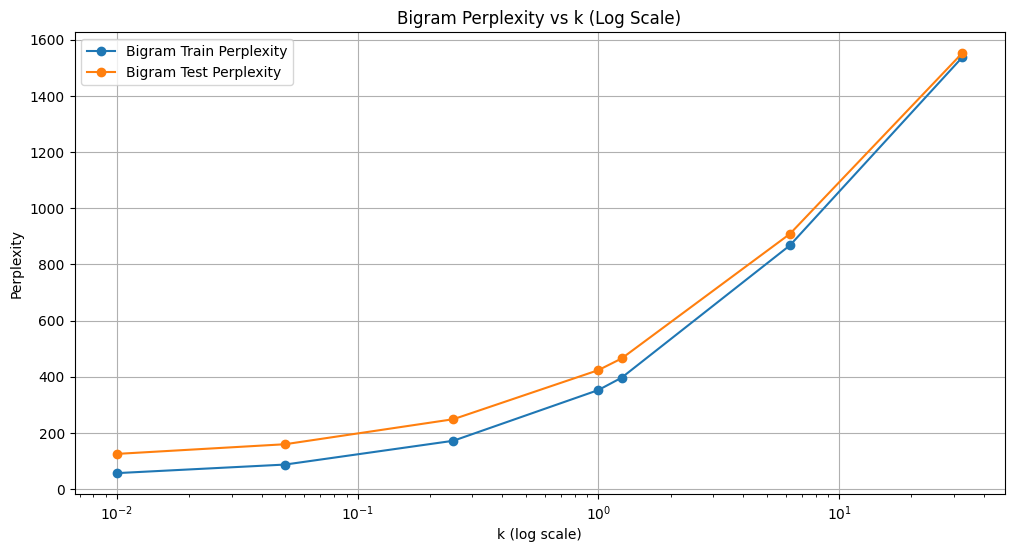

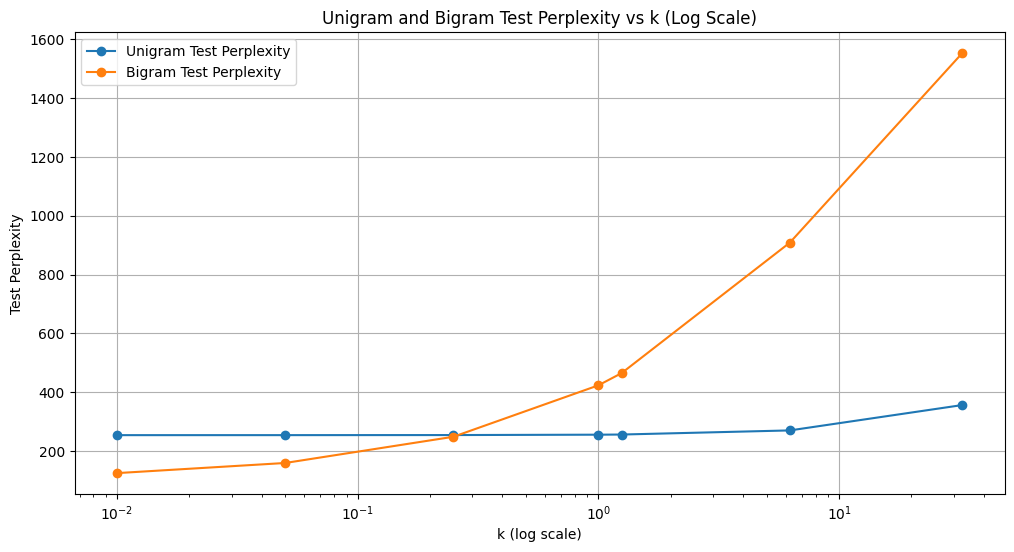

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('perplexity_data.csv')

# Filter out k = 0
df_filtered = df[df['k'] != 0]

# Plot Unigram Perplexity with log scale on x-axis
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['k'], df_filtered['Unigram Train Perplexity'], label='Unigram Train Perplexity', marker='o')
plt.plot(df_filtered['k'], df_filtered['Unigram Test Perplexity'], label='Unigram Test Perplexity', marker='o')
plt.xscale('log')
plt.title('Unigram Perplexity vs k (Log Scale)')
plt.xlabel('k (log scale)')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bigram Perplexity with log scale on x-axis
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['k'], df_filtered['Bigram Train Perplexity'], label='Bigram Train Perplexity', marker='o')
plt.plot(df_filtered['k'], df_filtered['Bigram Test Perplexity'], label='Bigram Test Perplexity', marker='o')
plt.xscale('log')
plt.title('Bigram Perplexity vs k (Log Scale)')
plt.xlabel('k (log scale)')
plt.ylabel('Perplexity')
plt.legend()
plt.grid(True)
plt.show()

# Plot both Unigram and Bigram Test Perplexities with log scale on x-axis
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['k'], df_filtered['Unigram Test Perplexity'], label='Unigram Test Perplexity', marker='o')
plt.plot(df_filtered['k'], df_filtered['Bigram Test Perplexity'], label='Bigram Test Perplexity', marker='o')
plt.xscale('log')
plt.title('Unigram and Bigram Test Perplexity vs k (Log Scale)')
plt.xlabel('k (log scale)')
plt.ylabel('Test Perplexity')
plt.legend()
plt.grid(True)
plt.show()

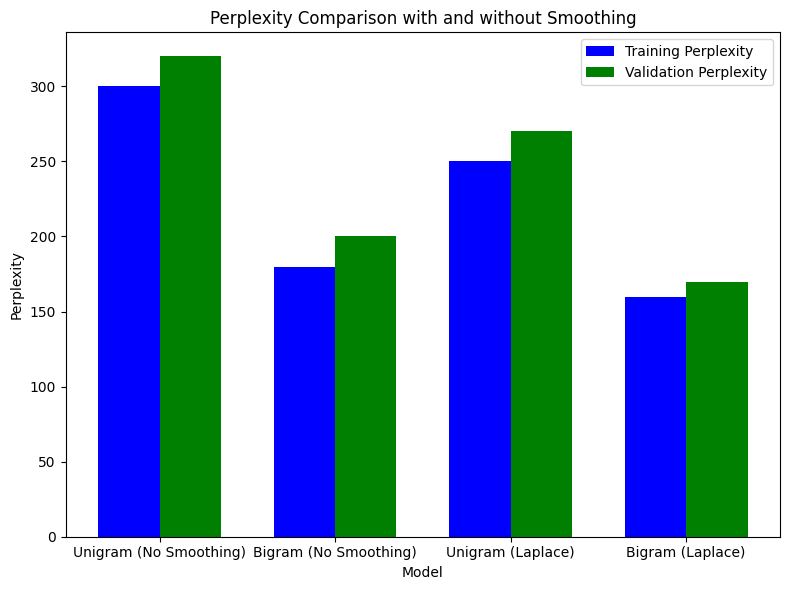

In [ ]:


# Sample data for training and validation perplexity with and without smoothing
data = {
    'Model': ['Unigram (No Smoothing)', 'Bigram (No Smoothing)', 'Unigram (Laplace)', 'Bigram (Laplace)'],
    'Training Perplexity': [300, 180, 250, 160],
    'Validation Perplexity': [320, 200, 270, 170]
}

# Create a dataframe
df = pd.DataFrame(data)

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.35

# Positions for bars
bar_positions = range(len(df))

# Plot bars for training and validation perplexities
ax.bar(bar_positions, df['Training Perplexity'], bar_width, label='Training Perplexity', color='b')
ax.bar([p + bar_width for p in bar_positions], df['Validation Perplexity'], bar_width, label='Validation Perplexity', color='g')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity Comparison with and without Smoothing')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(df['Model'])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# line graphs ish for perplexity comparison
# pratik look at this for plots!

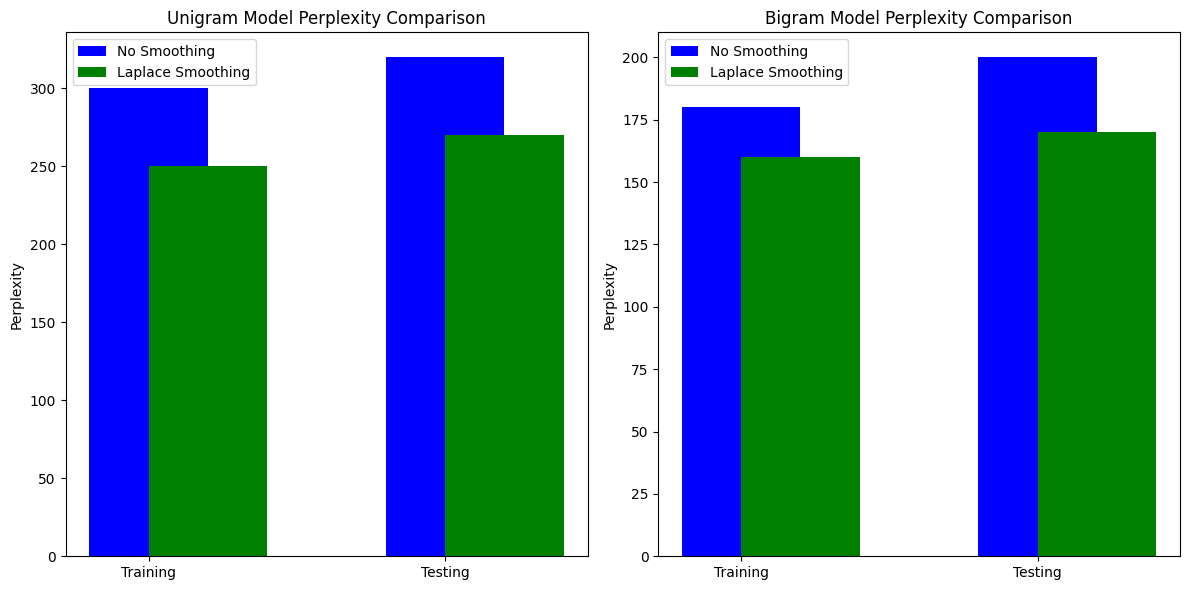

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Unigram and Bigram models
unigram_data = {
    'Set': ['Training', 'Testing'],
    'No Smoothing': [300, 320],
    'Laplace Smoothing': [250, 270]
}

bigram_data = {
    'Set': ['Training', 'Testing'],
    'No Smoothing': [180, 200],
    'Laplace Smoothing': [160, 170]
}

# Convert the data into dataframes
unigram_df = pd.DataFrame(unigram_data)
bigram_df = pd.DataFrame(bigram_data)

# Set up dual subplots for Unigram and Bigram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Unigram Perplexity comparison
ax1.bar(unigram_df['Set'], unigram_df['No Smoothing'], width=0.4, label='No Smoothing', color='blue', align='center')
ax1.bar(unigram_df['Set'], unigram_df['Laplace Smoothing'], width=0.4, label='Laplace Smoothing', color='green', align='edge')
ax1.set_title('Unigram Model Perplexity Comparison')
ax1.set_ylabel('Perplexity')
ax1.legend()

# Bigram Perplexity comparison
ax2.bar(bigram_df['Set'], bigram_df['No Smoothing'], width=0.4, label='No Smoothing', color='blue', align='center')
ax2.bar(bigram_df['Set'], bigram_df['Laplace Smoothing'], width=0.4, label='Laplace Smoothing', color='green', align='edge')
ax2.set_title('Bigram Model Perplexity Comparison')
ax2.set_ylabel('Perplexity')
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


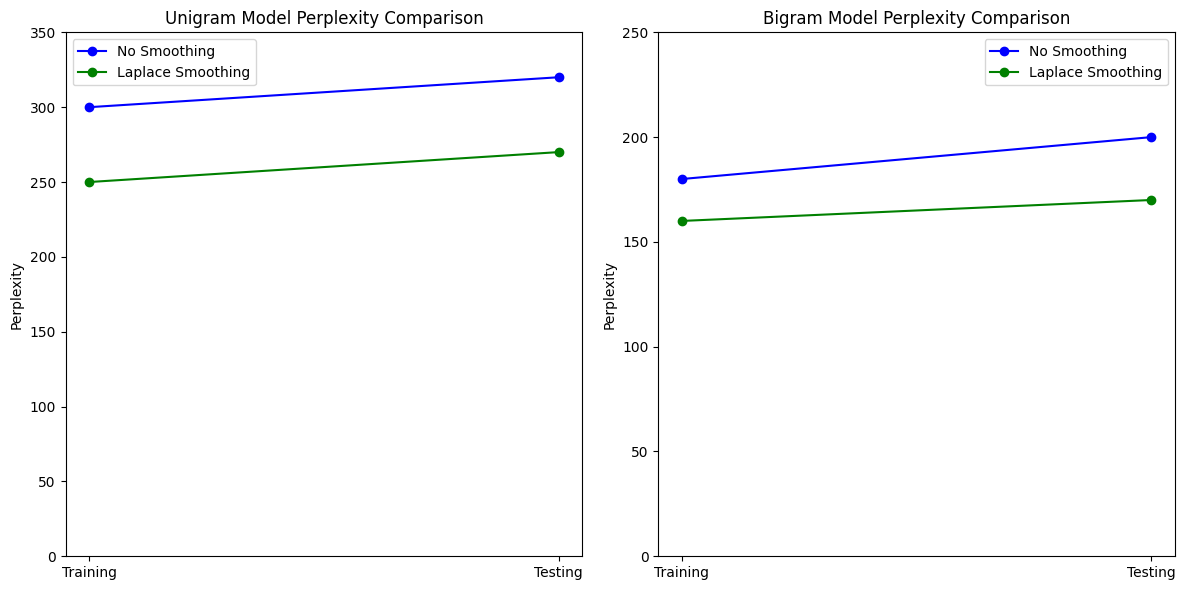

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Unigram and Bigram models
unigram_data = {
    'Set': ['Training', 'Testing'],
    'No Smoothing': [300, 320],
    'Laplace Smoothing': [250, 270]
}

bigram_data = {
    'Set': ['Training', 'Testing'],
    'No Smoothing': [180, 200],
    'Laplace Smoothing': [160, 170]
}

# Convert the data into dataframes
unigram_df = pd.DataFrame(unigram_data)
bigram_df = pd.DataFrame(bigram_data)

# Set up dual subplots for Unigram and Bigram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Unigram Perplexity comparison as a line graph
ax1.plot(unigram_df['Set'], unigram_df['No Smoothing'], marker='o', label='No Smoothing', color='blue')
ax1.plot(unigram_df['Set'], unigram_df['Laplace Smoothing'], marker='o', label='Laplace Smoothing', color='green')
ax1.set_title('Unigram Model Perplexity Comparison')
ax1.set_ylabel('Perplexity')
ax1.set_ylim(0, 350)  # Adjusting y-axis for better visibility
ax1.legend()

# Bigram Perplexity comparison as a line graph
ax2.plot(bigram_df['Set'], bigram_df['No Smoothing'], marker='o', label='No Smoothing', color='blue')
ax2.plot(bigram_df['Set'], bigram_df['Laplace Smoothing'], marker='o', label='Laplace Smoothing', color='green')
ax2.set_title('Bigram Model Perplexity Comparison')
ax2.set_ylabel('Perplexity')
ax2.set_ylim(0, 250)  # Adjusting y-axis for better visibility
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
